# Install and Import Modules

In [21]:
#@title
# https://keras.io/
!pip install -q keras\
import keras
import tensorflow as tf

  Could not find a version that satisfies the requirement kerasimport (from versions: )
No matching distribution found for kerasimport


In [0]:
import numpy as np
import pandas as pd
import pickle

# Get Access to Data

In [23]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1BZ3_iX3963pOOJdxMWq_rhNJEIkOlSt9' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  try:
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = os.path.join(local_download_path, f['title'])
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)
    print('Success')
  except:
    print('failed')

title: DataSet_1.pklz, id: 1-p3bdlTH7JBuE_Vjdf0-s6CZ1r6b9Dgu
downloading to /root/data/DataSet_1.pklz
Success
title: my_model_3.h5, id: 1CxVfNDrkTfUMtOImqE-6Wm3gytiQ1Ubf
downloading to /root/data/my_model_3.h5
Success
title: DataSet_0.pklz, id: 1EiJW--a29VB_grx2vZXNDGxVbwYrpnQf
downloading to /root/data/DataSet_0.pklz
Success
title: DataSet.pickle, id: 17iD97jZM33fYxRUMpCarJFUSQmWWvZwo
downloading to /root/data/DataSet.pickle
Success
title: DataSet.pklz, id: 1cTuSNKBjYA6hX3K8Nbg8y_QrHuBDZR6L
downloading to /root/data/DataSet.pklz
Success
title: DataSet.pickle, id: 1I4Z3xNbTJWIBXdalBZRDzjqgwWw-uljB
downloading to /root/data/DataSet.pickle
Success


In [0]:
import os
Path = os.path.expanduser('~/data/')
with open(Path + 'DataSet_1.pklz', 'rb') as f:
  X, y = pickle.load(f)

# Data Prepossessing 

In [5]:
PATH = Path

obs_periods = [30, 50, 100, 200, 500]
prd_periods = 60

X = pd.DataFrame()
y = None

for stock in stocks:
    df = pd.read_csv(PATH + stock)
    
    close = df.Close
    
    X_ = pd.DataFrame()
    
    for p in obs_periods:
        X_["SMA" + str(p)] = close.ewm(span = p, min_periods = 0).mean() - close
    
    X_ = X_[obs_periods[-1]:-prd_periods]
    #X_ = X_[obs_periods[-1]:]
    
    if X.empty:
        X = X_
    else:
        X = X.append(X_)
        
    y_ = close.pct_change(prd_periods)[obs_periods[-1] + prd_periods:]
    
    if y is None:
        y = y_
    else:
        y = pd.concat([y, y_])
        
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

NameError: ignored

In [0]:
X = X[y < 8]
y = y[y < 8]

In [7]:
y.max()

5.499999825377026

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape((-1, 1))).ravel()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, shuffle=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


array([0.26479735])

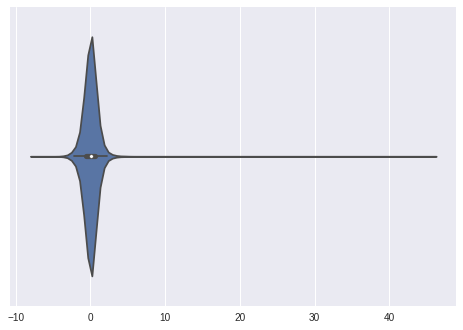

In [10]:
import seaborn as sns
sns.violinplot(y)

sc_y.inverse_transform([2.0])

# Building Network

In [6]:
X.shape

(466716, 10)

In [9]:
import keras
model = keras.models.load_model(Path + 'my_model_3.h5')

Using TensorFlow backend.


In [0]:
import keras
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dropout(rate=0.3))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(rate=0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Training

In [68]:
model.fit(X_train, y_train, batch_size=32, epochs=100, shuffle=True)

Epoch 1/100
368705/368705 [==============================] - 18s 50us/step - loss: 0.9541
Epoch 2/100
368705/368705 [==============================] - 19s 50us/step - loss: 0.9501
Epoch 3/100
368705/368705 [==============================] - 18s 50us/step - loss: 0.9581
Epoch 4/100
368705/368705 [==============================] - 18s 50us/step - loss: 0.9524
Epoch 5/100
368705/368705 [==============================] - 19s 51us/step - loss: 0.9581
Epoch 6/100
368705/368705 [==============================] - 19s 51us/step - loss: 0.9500
Epoch 7/100
368705/368705 [==============================] - 19s 51us/step - loss: 0.9480
Epoch 8/100
368705/368705 [==============================] - 19s 50us/step - loss: 0.9447
Epoch 9/100
368705/368705 [==============================] - 21s 56us/step - loss: 0.9480
Epoch 10/100
368705/368705 [==============================] - 20s 53us/step - loss: 0.9520
Epoch 11/100
368705/368705 [==============================] - 19s 51us/step - loss: 0.9484
Epoch 12

KeyboardInterrupt: ignored

# Prediction and Examination

** Classification Result**

** Regression Result **

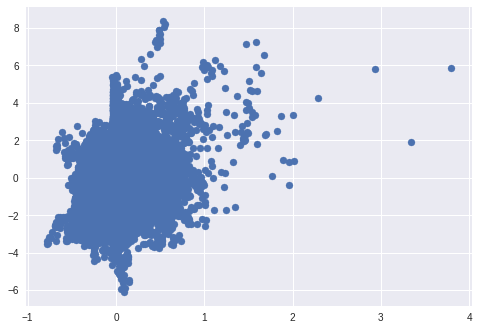

In [69]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

plt.scatter(predictions, y_test)

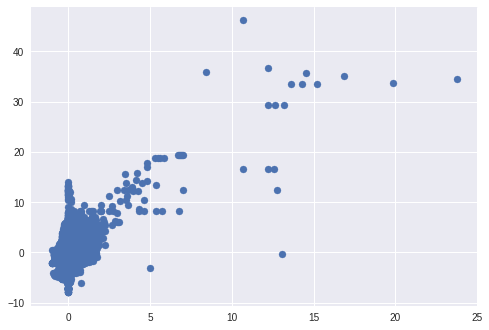

In [62]:
predictions = model.predict(X_train)

plt.scatter(predictions, y_train)

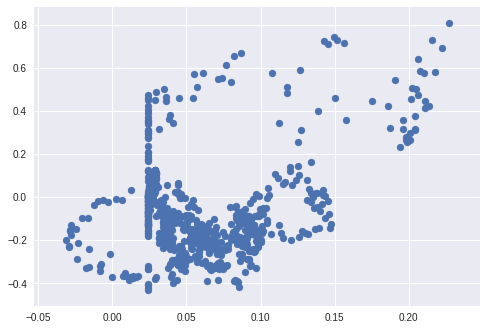

In [70]:
predictions = model.predict(X_test)
plt.scatter(sc_y.inverse_transform(predictions[:1000]), sc_y.inverse_transform(y_test[:1000]))

# Save Model

In [0]:
model.save('my_model_7.h5')

In [0]:
from google.colab import files


files.download('my_model_7.h5')

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1X_HVk7_nk3QheRphHmOsh7pr7Lb0YECf' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  try:
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = os.path.join(local_download_path, f['title'])
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)
    print('Success')
  except:
    print('failed')

In [0]:
from keras.models import load_model
classifier = load_model('/content/data/2-11 83-89 57-58.h5')

In [0]:
X.shape

In [0]:
pd.read_csv(Path + i)